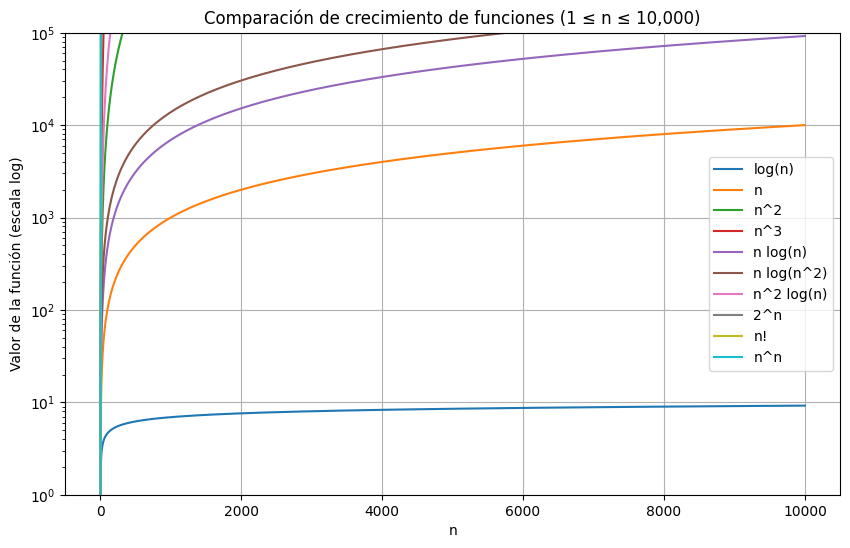

In [6]:
import math
import matplotlib.pyplot as plt

# Función para factorial aproximado usando Stirling en n > 20.
# Si hay overflow, retorna float('inf').
def factorial_aprox(n):
    if n <= 20:
        # Factorial exacto para valores pequeños
        return math.factorial(n)
    else:
        try:
            # Stirling: n! ~ sqrt(2*pi*n) * (n/e)^n
            # => sqrt(2*pi*n) * exp(n*(log(n) - 1))
            return math.sqrt(2*math.pi*n) * math.exp(n*(math.log(n) - 1))
        except OverflowError:
            return float('inf')

# Función para 2^n con control de overflow
def two_pow_n(n):
    try:
        return math.exp(n * math.log(2))
    except OverflowError:
        return float('inf')

# Función para n^n con control de overflow
def n_pow_n(n):
    if n <= 20:
        return n**n
    else:
        try:
            return math.exp(n * math.log(n))
        except OverflowError:
            return float('inf')

# Rango de n
n_vals = range(1, 10001)

# Listas vacías para cada función
y_log_n       = []
y_n           = []
y_n2          = []
y_n3          = []
y_n_log_n     = []
y_n_log_n2    = []
y_n2_log_n    = []
y_two_pow_n   = []
y_factorial   = []
y_n_pow_n     = []

for n in n_vals:
    # log(n)
    y_log_n.append(math.log(n))  # log base e

    # n
    y_n.append(n)

    # n^2
    y_n2.append(n**2)

    # n^3
    y_n3.append(n**3)

    # n log(n)
    # Aseguramos que log(n) no cause problemas cuando n=1 => log(1)=0
    y_n_log_n.append(n * math.log(n))

    # n log(n^2) = 2n log(n)
    y_n_log_n2.append(2 * n * math.log(n))

    # n^2 log(n)
    y_n2_log_n.append((n**2) * math.log(n))

    # 2^n (con control de overflow)
    val_2n = two_pow_n(n)
    y_two_pow_n.append(val_2n)

    # n! (con aproximación de Stirling + control de overflow)
    y_factorial.append(factorial_aprox(n))

    # n^n (con control de overflow)
    y_n_pow_n.append(n_pow_n(n))

# Configuramos la figura
plt.figure(figsize=(10, 6))

# Graficamos cada función
plt.plot(n_vals, y_log_n,      label='log(n)')
plt.plot(n_vals, y_n,          label='n')
plt.plot(n_vals, y_n2,         label='n^2')
plt.plot(n_vals, y_n3,         label='n^3')
plt.plot(n_vals, y_n_log_n,    label='n log(n)')
plt.plot(n_vals, y_n_log_n2,   label='n log(n^2)')
plt.plot(n_vals, y_n2_log_n,   label='n^2 log(n)')
plt.plot(n_vals, y_two_pow_n,  label='2^n')
plt.plot(n_vals, y_factorial,  label='n!')
plt.plot(n_vals, y_n_pow_n,    label='n^n')

# Escala logarítmica en el eje Y
plt.yscale('log')
plt.ylim(1, 10**5)  

plt.xlabel('n')
plt.ylabel('Valor de la función (escala log)')
plt.title('Comparación de crecimiento de funciones (1 ≤ n ≤ 10,000)')
plt.legend()
plt.grid(True)

# Guardamos la imagen
plt.savefig('todas_las_funciones.png', dpi=300)

plt.show()
